## Data analysis and knowledge discovery - Exercise 3: Unsupervised learning

This is the template for the third exercise. The purpose of this exercise is to familiarize yourself with the basics of unsupervised learning by using the agglomerative hierarchical clustering and k-means clustering algorithms to find patterns.

This exercise uses the wine dataset, available on moodle as `ex3_wine.csv`. The features are all numeric. They quantify chemical properties of wine, grown around the same area in Italy. The feature names are listed in the table below.

| Feature | Type 
| :--- | ---: 
| Alcohol | Numeric (float)
| Malic acid | Numeric (float)
| Ash | Numeric (float)
| Alcalinity of ash | Numeric (float)
| Magnesium | Numeric (integer)
| Total phenols | Numeric (float)
| Flavanoids | Numeric (float)
| Nonflavanoid phenols | Numeric (float)
| Proanthocyanins | Numeric (float)
| Color intensity | Numeric (float)
| Hue | Numeric (float)
| OD280/OD315 of diluted wines | Numeric (float)
| Proline | Numeric (integer)


In real applications, visualizing various aspects of the data the data and data scrubbing are important steps. However, in this exercise you can treat the data as given, and focus on the unsupervised methods.

### Library imports, Jupyter Notebook settings etc.

The below libraries are sufficient to complete the exercise. You can import additional modules here if you want.

In [7]:
import itertools # has some utilities that may be useful in the exercise
import warnings
warnings.filterwarnings('ignore') #Used for dismissing the output of known kmeans memory leak warning
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA

# IPython magic command to display matplotlib figures together with the output
# (Often the default setting in a Jupyter Notebook context, so your figures probably work fine without it)
%matplotlib inline

### Part 0: Read the data

- Download the exercise 3 data on the Moodle page of this course. (`ex3_wine.csv`)
- Read the data into a Pandas dataframe.
- Display a few rows and some basic information to make sure the data was loaded correctly

In [8]:

# Path for the data
data_path = 'ex3_wine.csv'

# Read the CSV file and print the first 5 rows
wine_data = pd.read_csv(data_path)
print(wine_data.head(5))

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

### Part 1: Preprocess and visualize the data

 - Perform z-score standardization on the features to ensure that all features have the same scale.
 - Project the data to two dimensions by using principal component analysis (PCA) and visualize the resulting two-dimensional data in a scatter plot. Don't color the scatter plot yet.
 - Does it look like there are clear clusters? Don't worry if they're hard to see. There may be more than one "correct" answer.
 - Draw shapes (for example `matplotlib.patches.Ellipse`) on top of the scatter plot to visualize any clusters you feel you can easily detect.

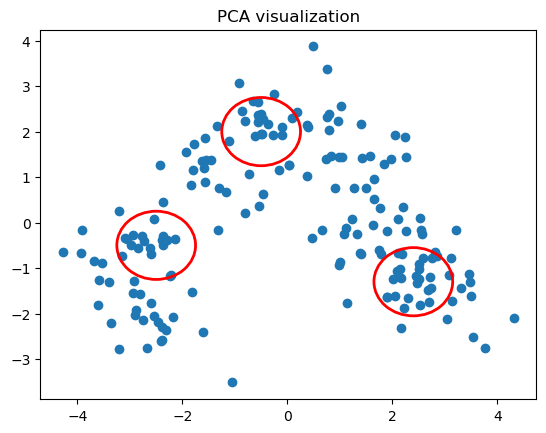

In [9]:
# Standardize data and PCA dimensionality reduction
scaler = StandardScaler()
wine_data_stan = scaler.fit_transform(wine_data.copy())
pca = PCA(n_components=2)
wine_data_pca = pca.fit_transform(wine_data_stan)
plt.scatter(wine_data_pca[:,0], wine_data_pca[:,1])
plt.title('PCA visualization')

# Draw ellipses around clusters
ax = plt.gca() # Get current axis
xy_clusters = [[-2.5,-0.5], [-0.5,2], [2.4,-1.3]]

for cluster in xy_clusters:
    ellipse = Ellipse(xy=(cluster), width=1.5, height=1.5, edgecolor='r', fc='None', lw=2)
    ax.add_patch(ellipse)


From the PCA reduction plot it's hard to clearly define if there are any clear clusters, but the three marked spots appear to have data points close to each other

### Part 2a: Agglomerative hierarchical clustering
 
 - Cluster the data into 2-10 clusters using agglomerative hierarchical clustering.
 - Try different values for the linkage parameter. (Ward, Single, Average and Complete)
 - Use the z-score standardized 13-dimensional data for clustering - **don't use the first two principal components for clustering!**
 - Explain why using the two principal components would be a bad idea for clustering.
 - Using silhouette score, evaluate the clustering performance for each linkage criterion and number of clusters combination. Sort the results by silhouette score.
 - Plot the data into a scatter plot again, this time colouring the data points according to the cluster they were assigned to. Use the best 6 clusterings according to silhouette score.
 - Do some of the clusterings discovered by agglomerative hierarchical clustering correspond to what visually looked like clusters to you in Part 1? It's absolutely fine if they don't.


*Tip: you can use `itertools.product` function to get the Cartesian product of the two lists of hyperparameters (number of clusters, linkage criterion)*

*Note: it's a common mistake to think that the points in the scatter plot should move when clustering, but they should not. Clustering can be visualized simply by colouring data points on an existing plot.*

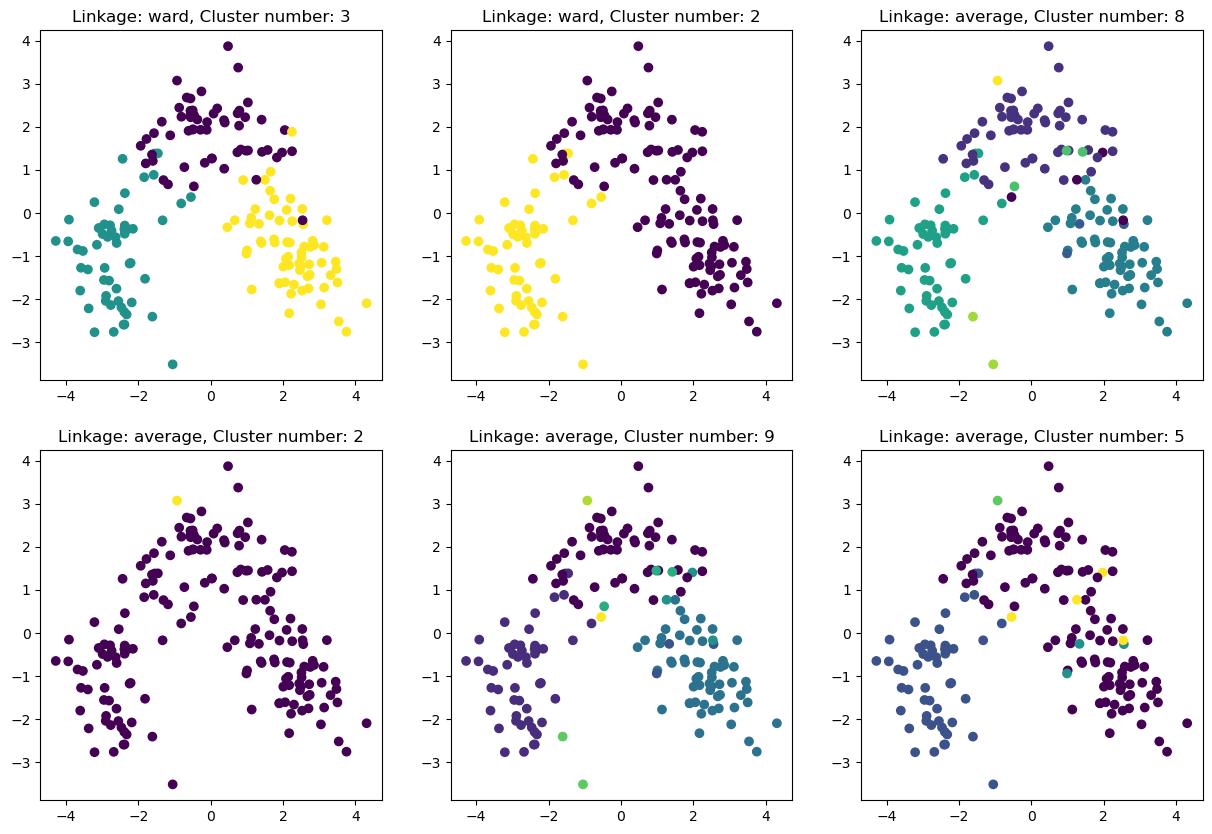

In [10]:
linkage_criterion = ['ward', 'complete', 'average', 'single']
cluster_num = range(2, 11)
result_list = []

# Loop through all combinations of linkage criterion and cluster number
param_product = list(itertools.product(linkage_criterion, cluster_num)) 

# Evaluate each combination using silhouette score
for param in param_product: 
    clustering = AgglomerativeClustering(n_clusters=param[1], linkage=param[0]).fit(wine_data_stan)
    sil_score = clustering.silhouette_score = silhouette_score(wine_data_stan, clustering.labels_)
    result_list.append((sil_score, param[1], param[0]))
    
sorted_list = sorted(result_list, reverse=True) #Sort list in descending order

# Plot the 6 best clusterings
plt.figure(figsize=(15,10))
for i in range(6):
    clustering = AgglomerativeClustering(n_clusters=sorted_list[i][1], linkage=sorted_list[i][2]).fit(wine_data_stan)
    plt.subplot(2,3,i+1)
    plt.scatter(wine_data_pca[:,0], wine_data_pca[:,1], c=clustering.labels_)
    plt.title('Linkage: ' + sorted_list[i][2] + ', Cluster number: ' + str(sorted_list[i][1]))
   


While PCA reduction assists in visually representing high-dimensional data, it also reduces the accuracy of the data, leading to a very undistributed representation. There were some similarities with the visually estimated clusters (the first plot) but the previous eclipses could've involved all of the data points. 

### Part 2b: Dendrograms

 - Plot dendrograms to visualize the merging processes.
 - For this you will need a linkage matrix. *Hint: while you can extract one from a fitted AgglomerativeClustering object, it is much easier to use the scipy implementation (`scipy.cluster.hierarchy.linkage`).*
 - Compute the linkage matrix using Ward and Single linkage, and plot the dendrograms using `scipy.cluster.hierarchy.dendrogram`.
 - Truncate the dendrogram for better readability. You may choose how exactly you want to do the truncation.
 - How do you interpret the dendrograms? How do they differ?

*Note: when truncating a dendrogram, a number in parentheses refers to the amount of samples in a subtree. A number without parentheses is the index of a single sample*

Text(0, 0.5, 'Cluster Distance')

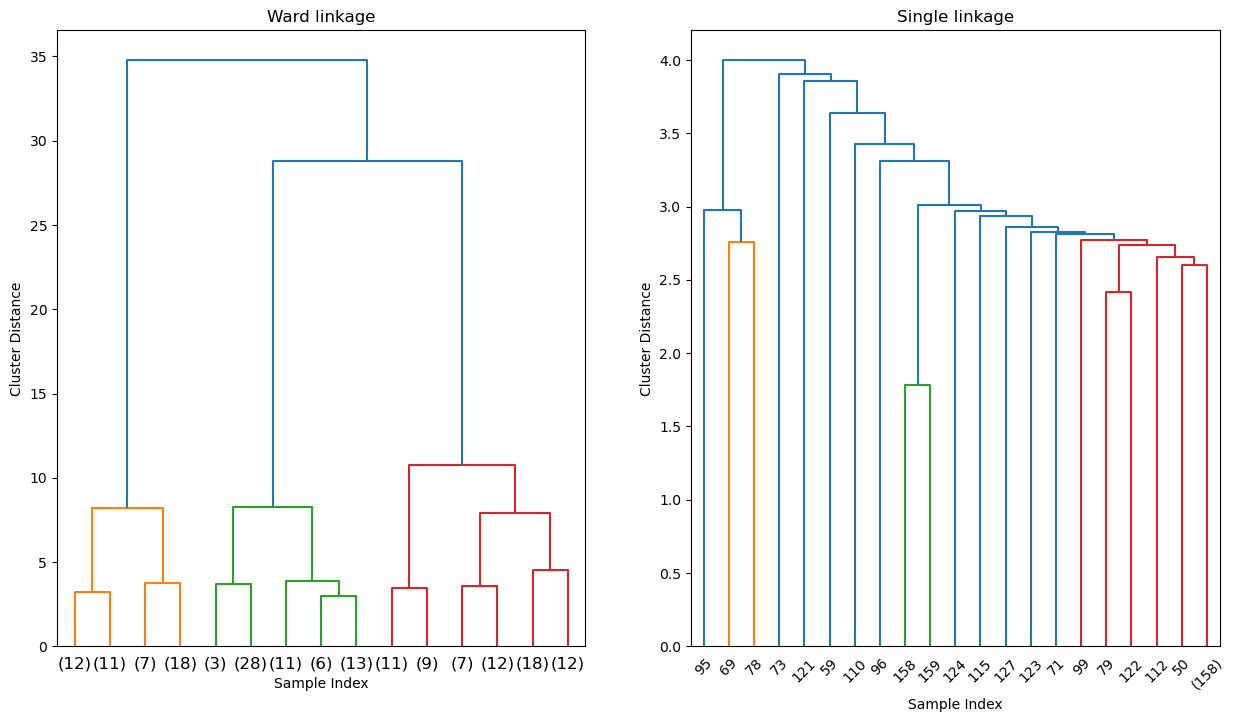

In [11]:
# Compute the linkage matrices
linkage_matrix_ward = linkage(wine_data_pca,'ward')
linkage_matrix_single = linkage(wine_data_stan, method='single')

# Plot the dendrograms
fig, axes = plt.subplots(1,2,figsize=(15,8))

ward_dendro = dendrogram(linkage_matrix_ward, ax=axes[0], truncate_mode='lastp', p=15)
axes[0].set_title('Ward linkage')
axes[0].set_xlabel('Sample Index')
axes[0].set_ylabel('Cluster Distance')

single_dendro = dendrogram(linkage_matrix_single, ax=axes[1], truncate_mode='level', p=15)
axes[1].set_title('Single linkage')
axes[1].set_xlabel('Sample Index')
axes[1].set_ylabel('Cluster Distance')

Each vertical line represents a cluster and the height at which both clusters merge point to the distance between them. For truncation 'lastp' was used for ward linkage to represent the 15 last non-singleton clusters formed. For single linkage, level was used to display the first 10 levels of the dendogram as the dendrogram exponentially widens for the lower levels

### Part 3: _k_-means clustering

 - Perform _k_-means clustering on the data. Try 2-10 numbers of clusters.
 - Evaluate the clustering performance using silhouette score.
 - Choose the best 3 numbers of clusters according to silhouette score that you discovered above, and once again visualize them on a scatter plot of the first two principal components.
 - Display the centroids of the clusters on the plot. Remember to transform the centroids to the PCA space. Explain why you need to transform the centroids.

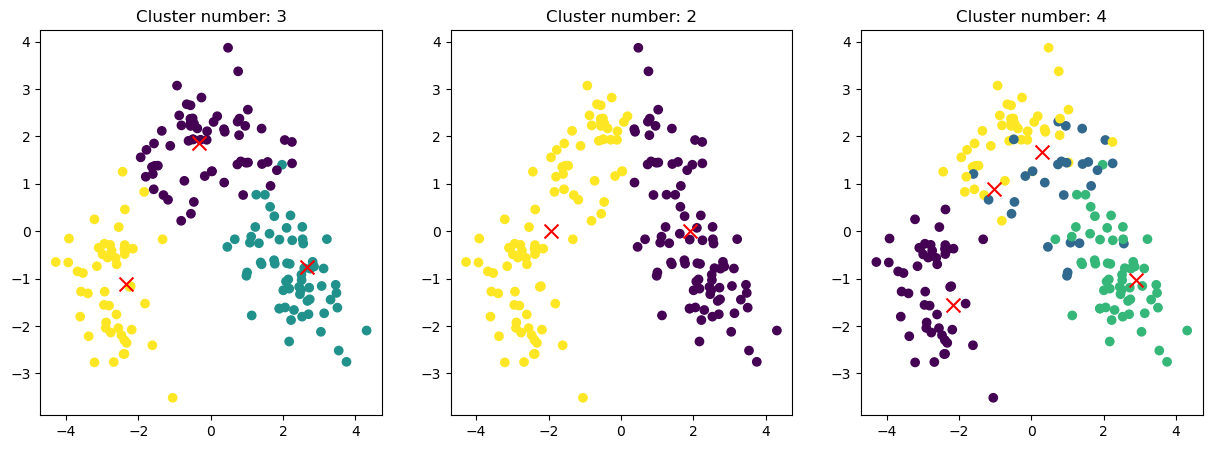

In [12]:

k_means_list = []

# Evaluate each cluster performance using silhouette score
for num in cluster_num: 
    k_means = KMeans(n_clusters=num, n_init='auto',).fit(wine_data_stan)
    sil_score = k_means.silhouette_score = silhouette_score(wine_data_stan, k_means.labels_)
    k_means_list.append((sil_score, num))
 
k_means_list = sorted(k_means_list, reverse=True) #Sort list in descending order

# Transform centroids to PCA space and plot the 3 best clusterings
plt.figure(figsize=(15,5))
for i in range(3):
    k_means = KMeans(n_clusters=k_means_list[i][1], n_init='auto').fit(wine_data_stan)
    centroid = pca.fit_transform(k_means.cluster_centers_)
    plt.subplot(1,3,i+1)
    plt.scatter(wine_data_pca[:,0], wine_data_pca[:,1], c=k_means.labels_)
    plt.scatter(centroid[:,0], centroid[:,1], color='red', marker='x', s=100)
    plt.title('Cluster number: ' + str(k_means_list[i][1]))

If the centroids aren't transformed to the PCA space, it doesn't correspond with the 2D plot. So as the clusters are represented in a two principal component scatter plot, so should the centroid's coordinates